In [110]:
import numpy as np
import matplotlib.pyplot as plt 


In [111]:
obs = np.array([880, 795, 782, 976, 178])
obs_error = 5

In [112]:
def alcance(v, theta):
    g = 9.8
    return v**2 * np.sin(2*theta)/g

In [113]:
def likelihood(v):
    points= 500
    theta = np.random.uniform(0,np.pi/2,points)
    alcances = alcance(v,theta)
    suma = 0
    for i in obs:
        suma += sum((alcances > (i-obs_error)) & (alcances < (i+obs_error)))
    return suma/points


def prior(v):
#     mu=92
#     s=20
#     return (1/(2*np.pi*s**2)**0.5)*np.exp(-(v-mu)**2/(2*s**2))
    p=0
    if v>0 and p<100:
        p=1/100
    return p


In [114]:
v = 90
npoints = 3000
vs = np.zeros(npoints)
vs[0]=v
for i in range(npoints-1):
    vpos = vs[i]+np.random.normal()
    
    post_viejo = likelihood(vs[i])*prior(vs[i])
    post_nuevo = likelihood(vpos)*prior(vpos)
    
    r = min(1,post_nuevo/post_viejo)
    
    alpha = np.random.random()
    if(alpha<r):
        vs[i+1] = vpos
    else:
        vs[i+1] = vs[i]
    
    


/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


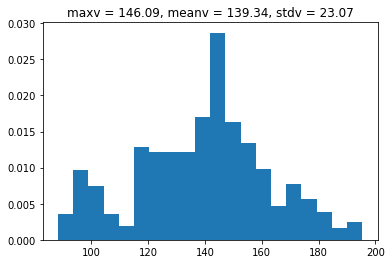

In [115]:
histo = plt.hist(vs,bins = 20,normed=True)
# maxvv = max(vs)
meanv = np.mean(vs)
stdv = np.std(vs)
hist, edges = np.histogram(vs,bins=50, density=True)
maxv=edges[1:][hist==max(hist)]
plt.title("maxv = {:.2f}, meanv = {:.2f}, stdv = {:.2f}".format(maxv[0],meanv,stdv))
plt.savefig("histo_regults.pdf")